In [1]:
# Importing necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import os

# Import utility scripts
import utils

In [2]:
# Load CSV file
train_csv_path = "data/training_set.csv"
train_df = pd.read_csv(train_csv_path)

# Convert to dictionary (image_name -> label)
label_dict = dict(zip(train_df.iloc[:, 0], train_df.iloc[:, 1]))

# Example output
print(label_dict)  # {'Image_46': 'sitting', 'Image_23': 'running', ...}

{'Image_1.jpg': 'sitting', 'Image_2.jpg': 'using_laptop', 'Image_3.jpg': 'hugging', 'Image_4.jpg': 'sleeping', 'Image_5.jpg': 'using_laptop', 'Image_6.jpg': 'sleeping', 'Image_7.jpg': 'drinking', 'Image_8.jpg': 'hugging', 'Image_9.jpg': 'clapping', 'Image_10.jpg': 'dancing', 'Image_11.jpg': 'cycling', 'Image_12.jpg': 'drinking', 'Image_13.jpg': 'clapping', 'Image_14.jpg': 'calling', 'Image_15.jpg': 'sleeping', 'Image_16.jpg': 'drinking', 'Image_17.jpg': 'calling', 'Image_18.jpg': 'laughing', 'Image_19.jpg': 'using_laptop', 'Image_20.jpg': 'using_laptop', 'Image_21.jpg': 'clapping', 'Image_22.jpg': 'eating', 'Image_23.jpg': 'fighting', 'Image_24.jpg': 'listening_to_music', 'Image_25.jpg': 'dancing', 'Image_26.jpg': 'drinking', 'Image_27.jpg': 'cycling', 'Image_28.jpg': 'laughing', 'Image_29.jpg': 'drinking', 'Image_30.jpg': 'dancing', 'Image_31.jpg': 'listening_to_music', 'Image_32.jpg': 'cycling', 'Image_33.jpg': 'sitting', 'Image_34.jpg': 'sitting', 'Image_35.jpg': 'sleeping', 'Image_

In [3]:
train_images_path = "data/train"

# Get a list of image files
image_files = os.listdir(train_images_path)

# Create a list of (image_path, label) pairs using full filenames
image_label_pairs = [(os.path.join(train_images_path, img), label_dict[img]) 
                     for img in image_files if img in label_dict]

# Example output
print(image_label_pairs[:5])  # [('path/to/train/Image_46.jpg', 'sitting'), ...]

[('data/train/Image_11832.jpg', 'using_laptop'), ('data/train/Image_8240.jpg', 'running'), ('data/train/Image_7173.jpg', 'running'), ('data/train/Image_1502.jpg', 'dancing'), ('data/train/Image_5764.jpg', 'eating')]


In [4]:
train_df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [5]:
train_df.shape

(12600, 2)

In [6]:
train_df['label'].value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

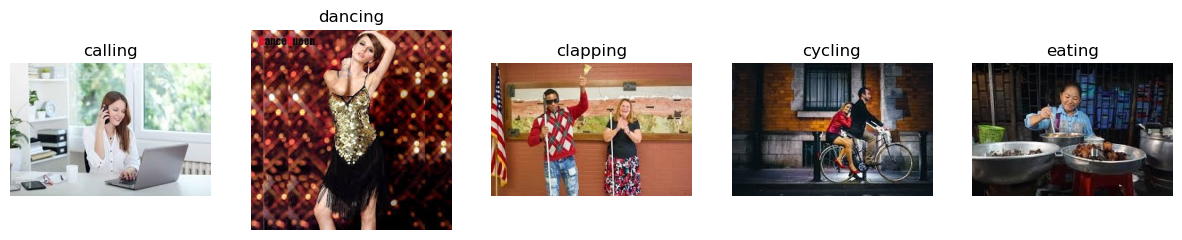

In [7]:
# Select random samples
sample_images = random.sample(image_label_pairs, 5)

# Plot images with labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (img_path, label) in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(label)

plt.show()

In [8]:
# Get all the unique image sizes in the dataset
unique_shapes = utils.get_unique_image_sizes(image_label_pairs)
print(f"Number of unique shapes: {len(unique_shapes)}")

Unique image sizes: {(260, 194), (273, 185), (274, 184), (190, 181), (150, 84), (265, 190), (250, 141), (449, 112), (185, 273), (293, 172), (237, 213), (177, 284), (268, 188), (314, 161), (301, 167), (263, 192), (284, 160), (212, 238), (240, 135), (199, 253), (183, 275), (300, 168), (259, 194), (299, 169), (262, 193), (170, 296), (253, 199), (266, 190), (189, 266), (194, 259), (278, 182), (263, 191), (295, 171), (283, 178), (299, 168), (225, 225), (262, 192), (275, 183), (290, 174), (246, 205), (126, 84), (261, 193), (266, 189), (287, 175), (226, 223)}
Number of unique shapes: 45


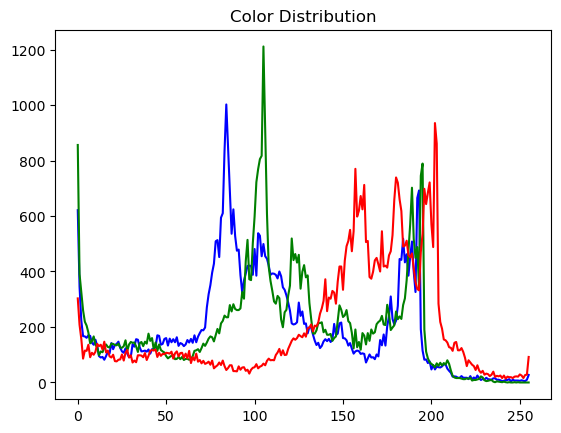

In [9]:
# Select a random image for color distribution
sample_img_path, _ = random.choice(image_label_pairs)
utils.plot_color_distribution(sample_img_path)

In [10]:
# Find the duplicate images in the dataset
utils.find_duplicates(image_label_pairs)

Duplicate found: data/train/Image_2586.jpg and data/train/Image_6872.jpg
Duplicate found: data/train/Image_6079.jpg and data/train/Image_4685.jpg
Duplicate found: data/train/Image_2344.jpg and data/train/Image_2032.jpg
Duplicate found: data/train/Image_4278.jpg and data/train/Image_12508.jpg
Duplicate found: data/train/Image_11104.jpg and data/train/Image_9897.jpg
Duplicate found: data/train/Image_1978.jpg and data/train/Image_6053.jpg
Duplicate found: data/train/Image_4021.jpg and data/train/Image_11662.jpg
Duplicate found: data/train/Image_9276.jpg and data/train/Image_4223.jpg
Duplicate found: data/train/Image_3613.jpg and data/train/Image_6901.jpg
Duplicate found: data/train/Image_2686.jpg and data/train/Image_5405.jpg
Duplicate found: data/train/Image_1991.jpg and data/train/Image_179.jpg
Duplicate found: data/train/Image_1942.jpg and data/train/Image_12525.jpg
Duplicate found: data/train/Image_9073.jpg and data/train/Image_5377.jpg
Duplicate found: data/train/Image_8386.jpg and d

In [11]:
# Check for corrupt images in the dataset
utils.check_corrupt_images(image_label_pairs)

No corrupt image found in the dataset
